In [1]:
%matplotlib inline
from keras.models import load_model
from keras.layers import Input
from sklearn.metrics import roc_curve, roc_auc_score

from skimage import io
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../networks")
sys.path.append("../")

from utils.load_data import *
from networks import *

MODELS_DIR = '../models'
WEIGHTS_DIR = '../weights'
DOCS_DIR = '../docs'
CSV_DIR = '../data/csv/'

ALEX_NET_W = os.path.join(WEIGHTS_DIR, 'alex_net_dbl_sigmoid-w.h5')
VGG_10_W = os.path.join(WEIGHTS_DIR, 'vgg_10_sigmoid-w.h5')
VGG_14_W = os.path.join(WEIGHTS_DIR, 'vgg_14_sigmoid-w.h5')



def distance(x, y):
    return np.sqrt(np.sum((x - y)**2, axis=1))

Using TensorFlow backend.


### Load Data

In [2]:
([X1, X2], y), ([X1_test, X2_test], y_test) = load_data(os.path.join(CSV_DIR, 'train_pairs.csv'), os.path.join(CSV_DIR, 'test_pairs.csv'))

In [7]:
X1.shape, X2.shape, y.shape, X1_test.shape, X2_test.shape, y_test.shape

((46907, 230, 105, 3),
 (46907, 230, 105, 3),
 (46907,),
 (24779, 230, 105, 3),
 (24779, 230, 105, 3),
 (24779,))

### Build networks architectures

In [9]:
alex_net = alex_net_dbl_sigmoid([230, 105, 3])
# vgg10_net = vggnet_10_sigmoid([230, 105, 3])
# vgg14_net = vggnet_14_sigmoid([230, 105, 3])

### Loading weights from pre-trained AlexNet network

In [10]:
alex_net_input = Input([230, 105, 3])

alexnet_model = alex_net(alex_net_input)

alexnet_model = Model(alex_net_input, alexnet_model)

alexnet_model.summary()

alexnet_model.load_weights(ALEX_NET_W)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 230, 105, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64)                35171392  
Total params: 35,171,392
Trainable params: 35,171,008
Non-trainable params: 384
_________________________________________________________________


### Loading weights from pre-trained VGG 10 network

In [33]:
vgg10_input = Input([230, 105, 3])

vgg10_model = vgg10_net(vgg10_input)

vgg10_model = Model(vgg10_input, vgg10_model)

vgg10_model.summary()

vgg10_model.load_weights(VGG_10_W)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 230, 105, 3)       0         
_________________________________________________________________
model_6 (Model)              (None, 64)                26004608  
Total params: 26,004,608
Trainable params: 24,269,120
Non-trainable params: 1,735,488
_________________________________________________________________


### Loading weights from pre-trained VGG 14 network

In [34]:
vgg14_input = Input([230, 105, 3])

vgg14_model = vgg14_net(vgg14_input)

vgg14_model = Model(vgg14_input, vgg14_model)

vgg14_model.summary()

vgg14_model.load_weights(VGG_14_W)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 230, 105, 3)       0         
_________________________________________________________________
model_7 (Model)              (None, 64)                26004608  
Total params: 26,004,608
Trainable params: 18,369,344
Non-trainable params: 7,635,264
_________________________________________________________________


### ROC ALEX NET

In [11]:
y1_alexnet = alexnet_model.predict(X1_test)

In [12]:
y2_alexnet = alexnet_model.predict(X2_test)

In [13]:
alexnet_dist = distance(y1_alexnet, y2_alexnet)

In [14]:
np.sum(alexnet_dist > 1)

19129

In [15]:
fpr, tpr, thr = roc_curve(y_test, alexnet_dist)

In [16]:
roc_auc_score(y_test, alexnet_dist)

0.89601568478554106

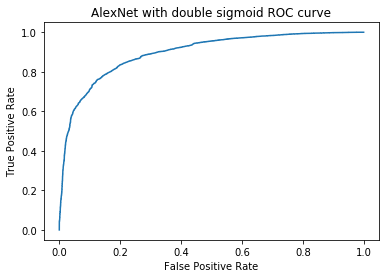

In [17]:
plt.plot(fpr, tpr)
plt.title("AlexNet with double sigmoid ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate");
plt.savefig(os.path.join(DOCS_DIR, "ALexNetDblSigmoid-ROC.png"))

In [18]:
not_same = alexnet_dist[y_test == 1]
same = alexnet_dist[y_test == 0] 

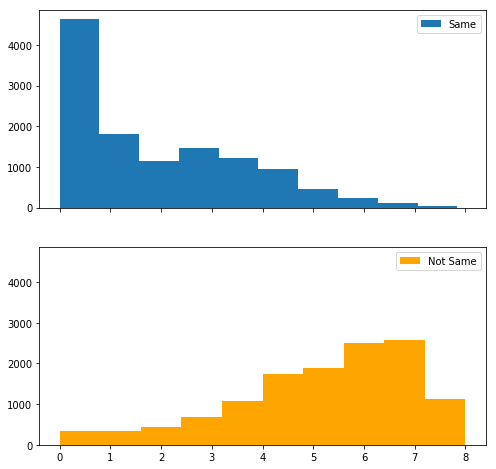

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,8))

ax[0].hist(same, label="Same");
ax[0].legend()
ax[1].hist(not_same, label="Not Same", color='orange');
ax[1].legend()


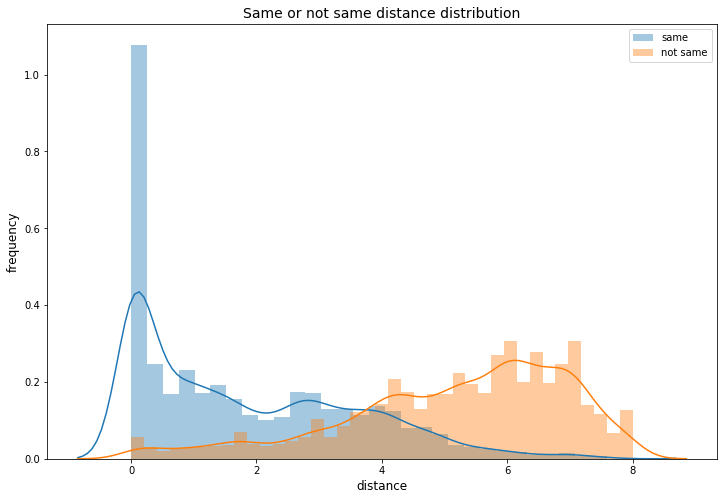

In [20]:
plt.figure(figsize=(12, 8))
sns.distplot(same, label='same')
sns.distplot(not_same, label='not same')
plt.legend()
plt.title("Same or not same distance distribution",  fontsize=14)
plt.xlabel("distance", fontsize=12)
plt.ylabel("frequency", fontsize=12);


### ROC VGG10 NET

In [41]:
y1_vgg10 = vgg10_model.predict(X1_test)

In [42]:
y2_vgg10 = vgg10_model.predict(X2_test)

In [43]:
vgg10_dist = distance(y1_vgg10, y2_vgg10)

In [44]:
np.sum(vgg10_dist > 1)

0

In [45]:
fpr, tpr, thr = roc_curve(y_test, vgg10_dist)

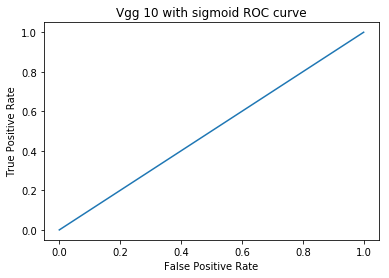

In [46]:
plt.plot(fpr, tpr)
plt.title("Vgg 10 with sigmoid ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate");
plt.savefig(os.path.join(DOCS_DIR, "Vgg10Sigmoid-ROC.png"))

### ROC VGG14 NET

In [47]:
y1_vgg14 = vgg14_model.predict(X1_test)

In [48]:
y2_vgg14 = vgg14_model.predict(X2_test)

In [49]:
vgg14_dist = distance(y1_vgg14, y2_vgg14)

In [50]:
np.sum(vgg14_dist > 1)

0

In [51]:
fpr, tpr, thr = roc_curve(y_test, vgg14_dist)

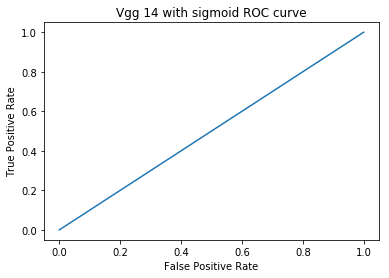

In [52]:
plt.plot(fpr, tpr)
plt.title("Vgg 14 with sigmoid ROC curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate");
plt.savefig(os.path.join(DOCS_DIR, "Vgg14Sigmoid-ROC.png"))